# - 철도에서 사고가 났을 때 차종들간의 상관관계

In [3]:
import warnings

warnings.filterwarnings(action='ignore') 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Carman = pd.read_excel('C:\\Users\\masterT\\Desktop\\시흥시프로젝트\\차대사람-도로형태별 분석.xlsx')
Carman

,single-way,intersection,railroad,car-man
0,1100,1152,0,400
1,1053,1040,0,379
2,1109,1096,0,419
3,917,990,0,418
4,909,989,0,356
5,1143,1138,0,416
6,1148,983,1,369
7,1157,1017,0,377
8,1178,1192,0,358
9,1076,1148,0,267


In [5]:
# X, Y 분할하기
Y = Carman['car-man']
X = Carman.drop(['car-man'], axis=1, inplace=False)

In [6]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [7]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [8]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [9]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [10]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 1328.334, RMSE : 36.446
R^2(Variance score) : -39.663


In [11]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  624.7626413305973
회귀 계수 값:  [ 0.1 -0.3  0. ]


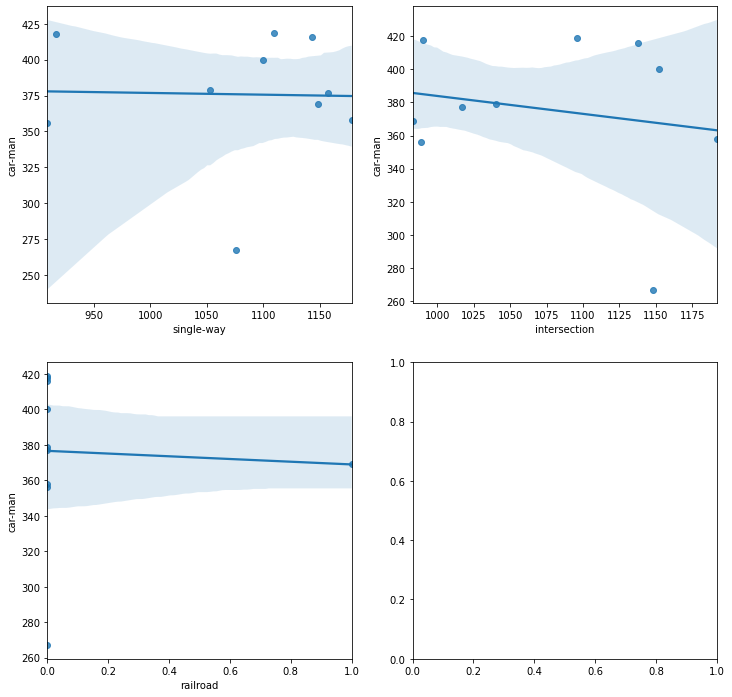

In [12]:
fig, axs = plt.subplots(figsize=(12, 12), ncols=2, nrows=2)

x_features = ['single-way', 'intersection', 'railroad']


for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2
      sns.regplot(x=feature, y='car-man', data=Carman, ax=axs[row][col])